<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/P_4_Correlation_coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Pearson correlation coefficient

In [21]:
import numpy as np
import pandas as pd

In [22]:
data = {"math" : [89, 76, 72, 95],
        "english" : [63, 75, 89, 76],
        "science" : [95, 90, 79, 88]}

In [23]:
df = pd.DataFrame(data = data, index=["Ha","Heo","Na","Park"])
df

,math,english,science
Ha,89,63,95
Heo,76,75,90
Na,72,89,79
Park,95,76,88


In [24]:
df.describe()

,math,english,science
count,4.000000,4.000000,4.000000
mean,83.000000,75.750000,88.000000
std,10.801234,10.626225,6.683313
min,72.000000,63.000000,79.000000
25%,75.000000,72.000000,85.750000
50%,82.500000,75.500000,89.000000
75%,90.500000,79.250000,91.250000
max,95.000000,89.000000,95.000000


In [25]:
#df["math"].mean()
math_mean = np.sum(df["math"])/len(df)
#df["english"].mean()
english_mean = np.sum(df["english"])/len(df)
print("수학 평균:", math_mean)
print("영어 평균:", english_mean)

수학 평균: 83.0
영어 평균: 75.75


In [26]:
cov = np.sum((df["math"] - math_mean)*(df["english"]-english_mean))

In [27]:
#math_std = np.sum((df["math"] - math_mean)**2)**(1/2)
#math_std = np.sum((df["math"] - math_mean)**2)**0.5
math_std = np.sqrt(np.sum((df["math"]-math_mean)**2))

#english_std = np.sum((df["english"] - math_mean)**2)**(1/2)
#english_std = np.sum((df["english"] - math_mean)**2)**0.5
english_std = np.sqrt(np.sum((df["english"]-english_mean)**2))

In [28]:
print("수학과 영어의 상관계수:", cov/(math_std*english_std))

수학과 영어의 상관계수: -0.6214985206543459


In [29]:
df.corr()

,math,english,science
math,1.000000,-0.621499,0.586432
english,-0.621499,1.000000,-0.985660
science,0.586432,-0.985660,1.000000


## 2. Visualization for Pearson coefficient

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [31]:
import matplotlib

In [32]:
print("library version check")
print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)

library version check
Numpy: 1.25.2
Pandas: 1.5.3
Matplotlib: 3.7.1
Seaborn: 0.13.1


In [33]:
from google.colab import files
hr_data_preprocessing = files.upload()

Saving hr_data_preprocessing.csv to hr_data_preprocessing.csv


In [34]:
df = pd.read_csv(io.BytesIO(hr_data_preprocessing['hr_data_preprocessing.csv']), encoding="utf-8", index_col=0)

In [35]:
df.columns

Index(['birthday', 'entry_year', 'department', 'marital_status',
       'performance_rating', 'job_satisfaction', 'working_hours', 'salary',
       'last_year_salary', 'num_companies_worked', 'attrition', 'birth_year',
       'age', 'years_at_company', 'salary_increasing_rate', 'department_hr',
       'department_rnd', 'department_sales', 'marital_status_etc',
       'marital_status_married', 'marital_status_single'],
      dtype='object')

In [36]:
numerical_col = ["working_hours",
                 "num_companies_worked",
                 "salary",
                 "age",
                 "years_at_company",
                 "salary_increasing_rate"]

In [37]:
df[numerical_col]

,working_hours,num_companies_worked,salary,age,years_at_company,salary_increasing_rate
0,8.33,8.0,9431500,45,12,5.690003
1,6.93,2.0,5170672,53,14,11.980024
2,9.00,6.0,9898200,41,11,7.870003
3,8.33,1.0,5673500,37,12,5.800007
4,7.20,9.0,3484080,31,10,6.080005
...,...,...,...,...,...,...
1465,7.50,4.0,3488175,40,21,8.520011
1466,8.33,4.0,4442500,43,13,7.990022
1467,8.33,1.0,8715500,31,10,10.200002
1468,8.67,2.0,6804200,53,21,7.440001


In [38]:
df[numerical_col].corr(method="pearson")

,working_hours,num_companies_worked,salary,age,years_at_company,salary_increasing_rate
working_hours,1.000000,0.073281,0.268553,0.041108,0.026069,-0.008055
num_companies_worked,0.073281,1.000000,0.043742,0.264777,0.199938,0.009242
salary,0.268553,0.043742,1.000000,0.037100,0.007591,-0.014821
age,0.041108,0.264777,0.037100,1.000000,0.681934,0.059222
years_at_company,0.026069,0.199938,0.007591,0.681934,1.000000,0.021076
salary_increasing_rate,-0.008055,0.009242,-0.014821,0.059222,0.021076,1.000000


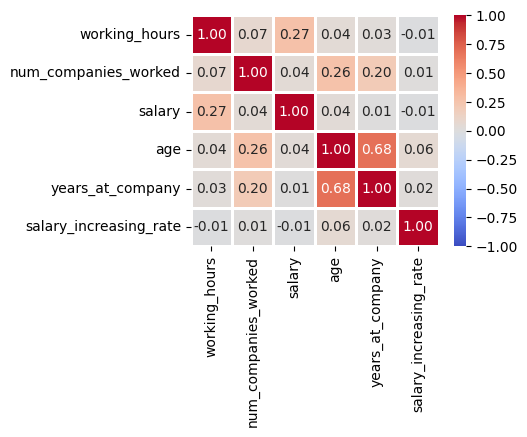

In [39]:
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(df[numerical_col].corr(method="pearson"),
            cmap="coolwarm",
            linewidths=1,
            linecolor="white",
            vmax=1,
            vmin=-1,
            annot=True,
            fmt=".2f");


In [40]:
###Don't trust numbers

In [41]:
import pandas as pd

In [42]:
datasaurus = {dataset: df[["x", "y"]].reset_index(drop=True)
            for dataset, df in pd.read_csv("../content/datasaurus.csv").groupby("dataset")}

In [43]:
datasaurus

{'away':              x          y
 0    32.331110  61.411101
 1    53.421463  26.186880
 2    63.920202  30.832194
 3    70.289506  82.533649
 4    34.118830  45.734551
 ..         ...        ...
 137  59.851838  72.958391
 138  48.960460  72.629526
 139  46.844855  36.791714
 140  39.963022  42.944915
 141  66.704944  32.015095
 
 [142 rows x 2 columns],
 'bullseye':              x          y
 0    51.203891  83.339777
 1    58.974470  85.499818
 2    51.872073  85.829738
 3    48.179931  85.045117
 4    41.683200  84.017941
 ..         ...        ...
 137  50.967748  29.679774
 138  91.191054  46.674343
 139  55.863768  85.336487
 140  49.280595  84.048823
 141  43.368502  84.332177
 
 [142 rows x 2 columns],
 'circle':              x          y
 0    55.993030  79.277264
 1    50.032254  79.013071
 2    51.288459  82.435940
 3    51.170537  79.165294
 4    44.377915  78.164628
 ..         ...        ...
 137  39.921363  19.701850
 138  84.794278  55.568650
 139  55.662959  83.35648

In [44]:
datasaurus.keys()

dict_keys(['away', 'bullseye', 'circle', 'dino', 'dots', 'h_lines', 'high_lines', 'slant_down', 'slant_up', 'star', 'v_lines', 'wide_lines', 'x_shape'])

In [47]:
datasaurus["away"]

,x,y
0,32.331110,61.411101
1,53.421463,26.186880
2,63.920202,30.832194
3,70.289506,82.533649
4,34.118830,45.734551
...,...,...
137,59.851838,72.958391
138,48.960460,72.629526
139,46.844855,36.791714
140,39.963022,42.944915


In [53]:
pd.DataFrame({name: pd.concat((df.mean().add_prefix("mean_"),
                               df.std().add_prefix("std_")))
            for name, df in datasaurus.items()}).style.format("{:.3f}")

,away,bullseye,circle,dino,dots,h_lines,high_lines,slant_down,slant_up,star,v_lines,wide_lines,x_shape
mean_x,54.266,54.269,54.267,54.263,54.260,54.261,54.269,54.268,54.266,54.267,54.270,54.267,54.260
mean_y,47.835,47.831,47.838,47.832,47.840,47.830,47.835,47.836,47.831,47.840,47.837,47.832,47.840
std_x,16.770,16.769,16.760,16.765,16.768,16.766,16.767,16.767,16.769,16.769,16.770,16.770,16.770
std_y,26.940,26.936,26.930,26.935,26.930,26.940,26.940,26.936,26.939,26.930,26.938,26.938,26.930


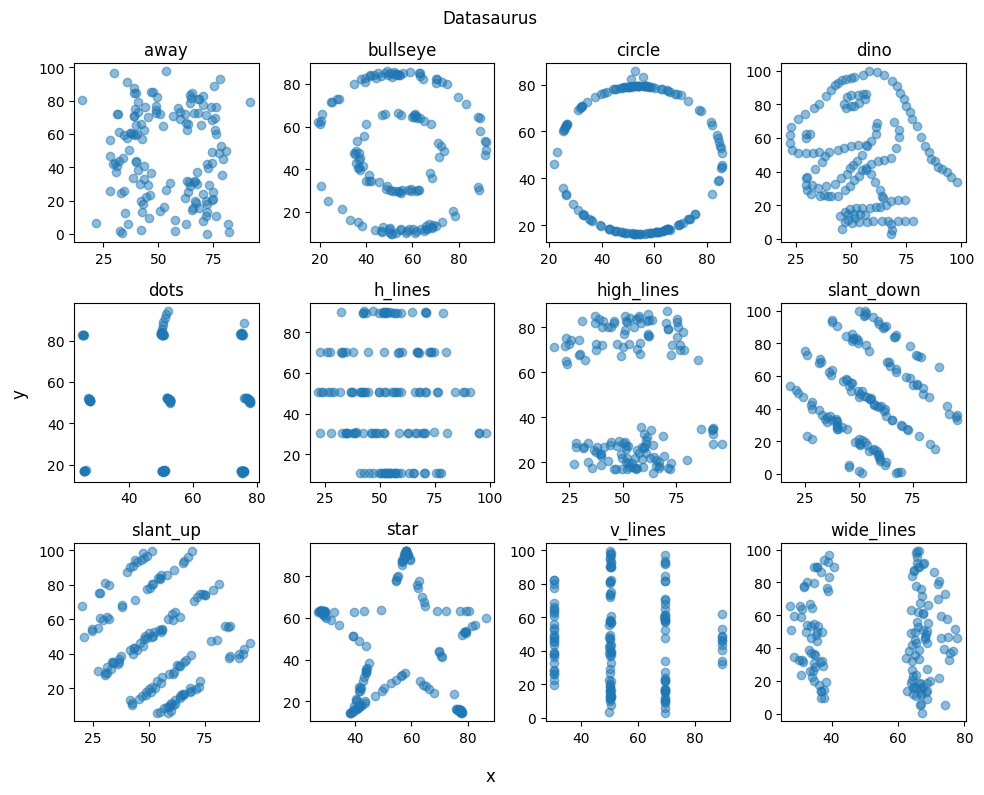

In [55]:
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for (dataset, df), ax in zip(datasaurus.items(), axes.flat):
    ax.scatter(df["x"], df["y"], alpha=0.5)
    ax.set_title(dataset)

fig.suptitle("Datasaurus")
fig.supxlabel("x")
fig.supylabel("y")
fig.tight_layout();